In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

sns.set()

In [0]:
def get_noise(n, alpha=0.5):
  return np.random.randn(n) * alpha

def gen_ground_truth(n, max_n):
  result = np.zeros((max_n, 1))
  result[n] = 1
  return result.T


def gen_dataset(n_class=5, n_per_class=100, noise_sigma=0.5, class_sigma=5):
  xcoord = []
  ycoord = []
  for i in range(n_class):
    xcoord.append(np.random.rand()*class_sigma + get_noise(n_per_class, noise_sigma))
    ycoord.append(np.random.rand()*class_sigma + get_noise(n_per_class, noise_sigma))

  xcoord = np.array(xcoord).reshape(n_per_class*n_class, 1)
  ycoord = np.array(ycoord).reshape(n_per_class*n_class, 1)
  
  x = np.concatenate([xcoord, ycoord], axis=1)
  y = np.concatenate([np.repeat(gen_ground_truth(i, n_class), n_per_class, axis=0) for i in range(n_class)])
  
  return x, y

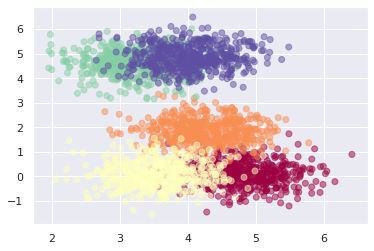

In [122]:
N = 500
NOISE = 0.5

x, y = gen_dataset(n_class=5, n_per_class=N, class_sigma=5)

plt.scatter(x[:,0], x[:,1], c=np.argmax(y, axis=1), alpha=0.5, cmap='Spectral')

In [0]:
shuffle_idx = np.arange(x.shape[0])
np.random.shuffle(shuffle_idx)

x = x[shuffle_idx]
y = y[shuffle_idx]

TRAIN_RATIO = 0.7
N_TRAIN = int(x.shape[0]*TRAIN_RATIO)

x_train = x[0:N_TRAIN, :]
y_train= y[0:N_TRAIN]

x_test = x[N_TRAIN:,:]
y_test = y[N_TRAIN:,:]

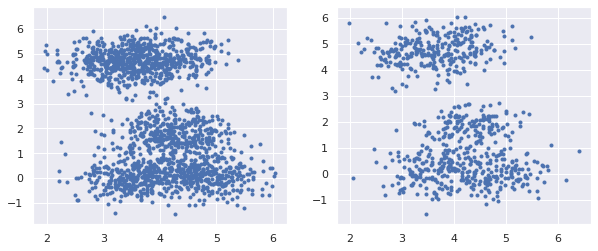

In [124]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(x_train[:,0], x_train[:, 1], '.')
plt.subplot(1,2,2)
plt.plot(x_test[:,0], x_test[:, 1], '.')